In [ ]:
import marimo as mo

In [ ]:
import random
import altair as alt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Set random seeds for reproducible snapshots
random.seed(42)
np.random.seed(42)

# Kitchen Sink Notebook

This notebook demonstrates all major marimo features including:
- app.setup
- markdown
- app.function
- app.class_definition
- app.embed()
- altair charts
- plotly charts
- matplotlib charts
- matplotlib interactive plots

## 1. Markdown Examples

marimo supports rich markdown with **bold**, *italic*, and `code` formatting.

### Lists
- Item 1
- Item 2
- Item 3

### Code blocks

```python
def hello_world():
    print("Hello, marimo!")
```

### Math

Inline math: $E = mc^2$

Block math:

$$
\int_{-\infty}^{\infty} e^{-x^2} dx = \sqrt{\pi}
$$

## 2. app.function Example

Functions decorated with `@app.function` can be used throughout the notebook.

In [ ]:
def calculate_stats(data) -> dict[str, float]:
    """Calculate basic statistics from a numpy array."""
    return {
        "mean": data.mean(),
        "std": data.std(),
        "min": data.min(),
        "max": data.max(),
    }

In [ ]:
random.seed(42)
np.random.seed(42)
sample_data = np.random.randn(1000)
stats = calculate_stats(sample_data)
mo.md(f"""
### Statistics for random data:
- Mean: {stats["mean"]:.3f}
- Std Dev: {stats["std"]:.3f}
- Min: {stats["min"]:.3f}
- Max: {stats["max"]:.3f}
""")

### Statistics for random data:
- Mean: 0.019
- Std Dev: 0.979
- Min: -3.241
- Max: 3.853

## 3. app.class_definition Example

Classes decorated with `@app.class_definition` can be instantiated and used across cells.

In [ ]:
class DataProcessor:
    """A sample class for processing data."""

    def __init__(self, data):
        self.data = data
        self.processed = False

    def process(self):
        """Apply some transformation to the data."""
        self.data = self.data * 2 + 10
        self.processed = True
        return self.data

    def get_summary(self):
        """Get a summary of the data."""
        return {
            "size": len(self.data),
            "processed": self.processed,
            "sum": self.data.sum(),
        }

In [ ]:
processor = DataProcessor(np.array([1, 2, 3, 4, 5]))
processed_data = processor.process()
summary = processor.get_summary()

mo.md(f"""
### DataProcessor Results:
- Processed data: {processed_data}
- Summary: {summary}
""")

### DataProcessor Results:
- Processed data: [12 14 16 18 20]
- Summary: {'size': 5, 'processed': True, 'sum': np.int64(80)}

## 4. UI Elements

In [ ]:
# Create some interactive UI elements
slider = mo.ui.slider(1, 100, value=50, label="Select a value")
text_input = mo.ui.text(value="Hello, marimo!", placeholder="Enter text...")
dropdown = mo.ui.dropdown(
    options=["Option 1", "Option 2", "Option 3"],
    value="Option 1",
    label="Choose an option",
)

mo.vstack([mo.md("### Interactive UI Elements"), slider, text_input, dropdown])

Interactive UI Elements

In [ ]:
mo.md(f"""
### Current UI Values:
- Slider: **{slider.value}**
- Text: **{text_input.value}**
- Dropdown: **{dropdown.value}**
""")

### Current UI Values:
- Slider: **50**
- Text: **Hello, marimo!**
- Dropdown: **Option 1**

## 4b. `app.emebed()`

In [ ]:
from sub_notebook import app

In [ ]:
(await app.embed()).output

Sub Notebook 
 This is a sub notebook.

## 5. Altair Charts

Altair provides a declarative API for creating statistical visualizations.

In [ ]:
random.seed(42)
np.random.seed(42)
# Create sample data for Altair
altair_data = pd.DataFrame(
    {
        "x": np.arange(50),
        "y": np.cumsum(np.random.randn(50)),
        "category": np.random.choice(["A", "B", "C"], 50),
    }
)

# Create an Altair chart
altair_chart = (
    alt.Chart(altair_data)
    .mark_line(point=True)
    .encode(
        x=alt.X("x:Q", title="Time"),
        y=alt.Y("y:Q", title="Value"),
        color=alt.Color("category:N", title="Category"),
        tooltip=["x", "y", "category"],
    )
    .properties(
        width=600,
        height=400,
        title="Altair Line Chart with Multiple Categories",
    )
    .interactive()
)

altair_chart

In [ ]:
# Another Altair example - bar chart
bar_data = pd.DataFrame(
    {"category": ["A", "B", "C", "D", "E"], "value": [23, 45, 56, 34, 67]}
)

bar_chart = (
    alt.Chart(bar_data)
    .mark_bar()
    .encode(
        x=alt.X("category:N", title="Category"),
        y=alt.Y("value:Q", title="Value"),
        color=alt.Color("value:Q", scale=alt.Scale(scheme="viridis")),
        tooltip=["category", "value"],
    )
    .properties(width=600, height=300, title="Altair Bar Chart")
)

bar_chart

## 6. Plotly Charts

Plotly provides interactive, publication-quality graphs.

In [ ]:
random.seed(42)
np.random.seed(42)
# Create a Plotly scatter plot
x_data = np.random.randn(100)
y_data = np.random.randn(100)
color_data = np.random.randn(100)

plotly_scatter = go.Figure(
    data=go.Scatter(
        x=x_data,
        y=y_data,
        mode="markers",
        marker=dict(
            size=10,
            color=color_data,
            colorscale="Viridis",
            showscale=True,
            colorbar=dict(title="Value"),
        ),
        text=[f"Point {i}" for i in range(100)],
    )
)

plotly_scatter.update_layout(
    title="Plotly Scatter Plot",
    xaxis_title="X Axis",
    yaxis_title="Y Axis",
    hovermode="closest",
    width=700,
    height=500,
)

plotly_scatter

<marimo-plotly data-figure='{"data":[{"marker":{"color":{"dtype":"f8","bdata":"CI7n9Pzl1j9hVxtk8vHhP4JHVYotVPE/XSlfil/c8D8mOgEJ7wr2v2fFeaipAu6/gFSePSt74D+H/Qk873DgPwIUEklFe+A/BA1F42TSDkC2wyAtvETiP3SXcOBGK/I/vPLQtC6H7j8SSSh3MtjkP9iNyg1fLdS/5A2W0XlJ6D9Y0b7x+7rovwAthHUSUM6/kS0mRTIQ378lag0ftPW0P9Im6rVrhAJAT0Byd1Hg/b+SkUbu1/XlP8n+Ryivzfm/T2BgtiE03r/G8w52V2zxP+gfzcOndLA/KULqTnE+8b9tVL+axOPmv0SCQ8dDv+U/qhKq1ylf57/pr5hB6rTLP3PHAjQxVac/Ve/g+OjZ5L+V1qAozCYBQIFhpYsQSeQ/PXPb9H0zAMD8/hAovN3HP6yz485aLeW/PwrfRSJH6z8KDJ9zVFzpv/J+wg9eX72/N78DFdso4D+NsKk8RLTrP0v5XAFqNPO/JiQa33do1b9ayrQEgWXev4qY7bQS6OS/KngJ8kw//D8ljANpOOvZPwu5PqeULPS/D/uaBCBf7T9KYjkHLfoAQDcsBUv6hPA/AsGk4VZP+L+NcaTosP3ev/EbC6BERfQ/Frxmbzql5r8U602aiWfcP/QZu1rNyeg/yf+iF2qp7b9e6SKDG3quv0GEOZId7gnAUVGfS+Rj8L/Pqo+bEyrQvwSbcH/r9vO/Ch3AUFse+j/p9O/s2+H2v4WDyVmwKdy/JBracxu8wD93MpKUdA/3PxIUTpdK+fa/CF82mFGc8j/kN1YzEvWEP6y+n9SEaO+/1wlVcxqT3T9gSjjByXrJP83vPAb6NOO/yog5qIzesT++bE5c+qjYv4YCYgV5D70/z+EXqyww5T9cAUQrU2D5P4YX358XzvO/xWZLzXMQAUB/6p1qwDv/v8BamamxbcO/ic8wm37T4j+ESpdQxfvRP8uoG4sn7eO/sl1t+b+jyr+sdNDKU43fvy6xj3oT3OK/sC+qvPAv6z/Pqhh7V9nWP9dUV75QLOa/aRaPrYXJ7D/XdA+cy6rTP1lCEmv3Auo/wsSVYusl5D8="},"colorbar":{"title":{"text":"Value"}},"colorscale":[[0.0,"#440154"],[0.1111111111111111,"#482878"],[0.2222222222222222,"#3e4989"],[0.3333333333333333,"#31688e"],[0.4444444444444444,"#26828e"],[0.5555555555555556,"#1f9e89"],[0.6666666666666666,"#35b779"],[0.7777777777777778,"#6ece58"],[0.8888888888888888,"#b5de2b"],[1.0,"#fde725"]],"showscale":true,"size":10},"mode":"markers","text":["Point 0","Point 1","Point 2","Point 3","Point 4","Point 5","Point 6","Point 7","Point 8","Point 9","Point 10","Point 11","Point 12","Point 13","Point 14","Point 15","Point 16","Point 17","Point 18","Point 19","Point 20","Point 21","Point 22","Point 23","Point 24","Point 25","Point 26","Point 27","Point 28","Point 29","Point 30","Point 31","Point 32","Point 33","Point 34","Point 35","Point 36","Point 37","Point 38","Point 39","Point 40","Point 41","Point 42","Point 43","Point 44","Point 45","Point 46","Point 47","Point 48","Point 49","Point 50","Point 51","Point 52","Point 53","Point 54","Point 55","Point 56","Point 57","Point 58","Point 59","Point 60","Point 61","Point 62","Point 63","Point 64","Point 65","Point 66","Point 67","Point 68","Point 69","Point 70","Point 71","Point 72","Point 73","Point 74","Point 75","Point 76","Point 77","Point 78","Point 79","Point 80","Point 81","Point 82","Point 83","Point 84","Point 85","Point 86","Point 87","Point 88","Point 89","Point 90","Point 91","Point 92","Point 93","Point 94","Point 95","Point 96","Point 97","Point 98","Point 99"],"x":{"dtype":"f8","bdata":"fDCpKCrK3z8qBd4FpbLBv2heJFDdueQ/K6oBjlRe+D9AplffvPjNvzvbcCYz+M2/CHRAqHRE+T/z1/BG047oP4ueeUveC96/fS1q4aZc4T9wG8Guoqjdv+fvFiuEzt2/cPmepZ74zj++Ne6+y5z+vxLk7nBDmfu/YzyhakL+4b95UaNnjjTwvx+GFtigHNQ/+wOLgYgO7b/IExTEy5j2v0ENnx9Mc/c/2Zhm4TzmzL/GNbFGh0mxP2InDcHEy/a/KPrKUZVr4b81BjE/bGW8PxX1zj14avK/6N19s28L2D/SOz2hbjjjv6DS80Icq9K/p/2pOS5B479X9hhz7qL9P4KDsNZupIu/RMyHS2Ls8L83Lh+1SVLqPxx64lmTiPO/tWnv0gq8yj/DMFAPz1r/v/9asANAQPW/QDr0vL8yyT++nUiqhKHnPwwupFVl78U/XzGyNiCbvb/hr1BvSEXTvwa4sKwGqPe/J6aouPYI57/ZriIKG3vdv2LC1/746fA/iEEAkdf91T9OFQ2YaTX8vzhYbbDKvdQ/QA8qJjCl2L9NOahTWKnlv/nsCSfakuM/1Pz0Wvl+8D8enOD2C83tP1MVD7Xe2uq/zylztCLK07+KTA+JazPVPwBoGGqqN+8/VWYobMqq3r8Tbn1grMPHvzBuPE2Ms/G/9PWajqkj87+w1UonNgDqP/3Ng74os/U/+iMrXUFvsr9qgA6DeA7wP0KkKG0LJdc/rwoBL9Kk5L+P6aQIGyHXPyBgEDvMm/g/URmlZMpXor8w1znJxwj5P19fz+s89QTAv1gZewZN6j8prkt3t0i2P8ft4LnvItO/OIpGXqJ9tz/iHOwPFc3/v8FsDls1Hsy/04nor+7a1j8349E5dKX3PzA8v2yrleC/S3Lu+S3f6b+hdpfJZA7gv5AGx2H5Su0/gMUgGEIK1T/02ryry/PgvwNc6tKvbOA/OiugAxPauD9TvHjHI//uP3hIyAw4d+a/l5Lxpmr41L8apYzLTBjZvxD0dqaOave/IzBrdqLz0j8UgR0sIbXQPxk6yBDZ8XQ/lk70gPMGzr8="},"y":{"dtype":"f8","bdata":"BCaNylul9r90hh9c2uvavws0Ft4I79W/fDE0YUGs6b/Ac3WcAqXEvzMc/B/429k/GwJ+RNEt/j+RJ1zWkFjGP5Z7TqK0e9A/WFWJNeMOs7/tciNySbP+vzhGxw90Jpu/rRjbe37Wrj+4CNpHuLQDQOSGYbpIn8i/cjBhOY1M0z8IMle3vcWhv88R8r3nsvK/XG9XkwBJ8j9WfwXd1Q/oP9CD1DoiUOk//I03uLMZ7b80xIdy2HH2Pxrk

In [ ]:
# Create a Plotly Express 3D scatter plot
t = np.linspace(0, 10, 100)
x_3d = np.sin(t)
y_3d = np.cos(t)
z_3d = t

plotly_3d = px.scatter_3d(
    x=x_3d,
    y=y_3d,
    z=z_3d,
    color=t,
    labels={"x": "X", "y": "Y", "z": "Z"},
    title="Plotly 3D Spiral",
    color_continuous_scale="Plasma",
)

plotly_3d.update_traces(marker=dict(size=5))
plotly_3d.update_layout(width=700, height=600)

plotly_3d

<marimo-plotly data-figure='{"data":[{"hovertemplate":"X=%{x}<br>Y=%{y}<br>Z=%{z}<br>color=%{marker.color}<extra></extra>","legendgroup":"","marker":{"color":{"dtype":"f8","bdata":"AAAAAAAAAAAxb2dIzNu5PzFvZ0jM28k/ZZNNNtlk0z8xb2dIzNvZP3+lQK1fKeA/ZZNNNtlk4z9LgVq/UqDmPzFvZ0jM2+k/F1100UUX7T9/pUCtXynwP3Icx3Ecx/E/ZZNNNtlk8z9YCtT6lQL1P0uBWr9SoPY/Pvjggw8++D8xb2dIzNv5PyTm7QyJefs/F1100UUX/T8K1PqVArX+P3+lQK1fKQBA+OCDDz74AEByHMdxHMcBQOtXCtT6lQJAZZNNNtlkA0DezpCYtzMEQFgK1PqVAgVA0UUXXXTRBUBLgVq/UqAGQMS8nSExbwdAPvjggw8+CEC3MyTm7QwJQDFvZ0jM2wlAq6qqqqqqCkAk5u0MiXkLQJ4hMW9nSAxAF1100UUXDUCRmLczJOYNQArU+pUCtQ5AhA8++OCDD0B/pUCtXykQQDtDYt7OkBBA+OCDDz74EEC1fqVArV8RQHIcx3EcxxFALrrooosuEkDrVwrU+pUSQKj1KwVq/RJAZZNNNtlkE0AiMW9nSMwTQN7OkJi3MxRAm2yyySabFEBYCtT6lQIVQBWo9SsFahVA0UUXXXTRFUCO4ziO4zgWQEuBWr9SoBZACB988MEHF0DEvJ0hMW8XQIFav1Kg1hdAPvjggw8+GED7lQK1fqUYQLczJObtDBlAdNFFF110GUAxb2dIzNsZQO4MiXk7QxpAq6qqqqqqGkBnSMzbGRIbQCTm7QyJeRtA4YMPPvjgG0CeITFvZ0gcQFq/UqDWrxxAF1100UUXHUDU+pUCtX4dQJGYtzMk5h1ATTbZZJNNHkAK1PqVArUeQMdxHMdxHB9AhA8++OCDH0BArV8pUOsfQH+lQK1fKSBAXXTRRRddIEA7Q2LezpAgQBoS83aGxCBA+OCDDz74IEDXrxSo9SshQLV+pUCtXyFAk0022WSTIUByHMdxHMchQFDrVwrU+iFALrrooosuIkANiXk7Q2IiQOtXCtT6lSJAyiabbLLJIkCo9SsFav0iQIbEvJ0hMSNAZZNNNtlkI0BDYt7OkJgjQCIxb2dIzCNAAAAAAAAAJEA="},"coloraxis":"coloraxis","symbol":"circle","size":5},"mode":"markers","name":"","scene":"scene","showlegend":false,"x":{"dtype":"f8","bdata":"AAAAAAAAAABWWTD1i9C5P1FTX5rcrsk/gsOxNjYZ0z9VYwJ3JinZPxcA895s994/joZ7TnE64j/qrfXjmcnkP2ssuWGCIuc/Iswnjgo/6T+RI+TArxnrP1BTS0Sbrew/3oUw9q727T8Xi+UGkPHuP/kGhbqvm+8/OPqkFVLz7z8TWwZkkvfvP5TacY1lqO8/kSusMpoG7z8wOzaS1hPuPz2qWDqU0uw/jV22kxlG6z8pMUFVcXLpP4gS3/dfXOc/1MdGRVcJ5T/m1IwiaH/iP8q16nZlit8/8e22b6rD2T9j8JxQsrnTPwFWfWl/+Mo/+7miP25uvD8ew57TVQ2FP7c2U+b2Mbe/NJcb8IdkyL+cMtDaNXjSv4gGHUH0jdi/BM5I1Z1j3r8dASM//PThv5J0Xo5MieS/fMX9lQTo5r9AD0Xy9Arpv5gfWUKK7Oq/hEBctduH7L9UjGrat9jtv9nTBZKv2+6/Gw5iBB+O778QwS6FNO7vv7NU4lL1+u+/vLAjJUC0778fSaaDzRrvv6PqleQtMO6/ehV7l8X27L+nYD+HxnHrv2I/nOMnpem/D922x5uV57/CVOv4gkjlv1eewt3ew+K/ZCe00UEO4L8DKjT9e13av93iNNGlWdS/wgS4cmdBzL8fFrKmiwu/v2He8+4MDZW/u4zZNsGStD+7ZD9aihnHP7P36Je11tE/W/DDABjy1z9jyIBZ/M7dP8e6gdUKr+E/qWzMAXFI5D//7Lop6KzmP7yvSOox1ug/Al+5UKq+6j+T7POSVmHsP14AZw7yue0/UWGMa/nE7j/0lfnIs3/vP+x2ENY56O8/b1zFynr97z+a4IMvP7/vP+dX8G0pLu8/1DgMKbRL7j8lnQ9hLhrtP0+yCm21nOs/N08I2izX6T+2POhENM7nPxy7bUkbh+U/z6j/pdMH4z+wXUa44VbgP6UpR/aW9to/VbjOZAz51D8WLl/Qi4nNP2bQXAjp08A//1m7LN2Snz/o7+kO/fKxv37G6czszcW/VIdizLk00b98w03tlVXXvzzw4HCMOd2/Uk/z9Z5o4b8="},"y":{"dtype":"f8","bdata":"AAAAAAAA8D9stRluPtbvP/RmmLFmWe8/yNmrmb6K7j90bjl5YWztPzbnWqc6Aew/j8z94P1M6j92c4WfHVToPyaJpn2/G+Y/HRvGyK6p4z/FGOphTQThPwuuYysGZdw/P1edLVd31j+/pAmUBk/QP2iwSFdM+MM/7bevprZ5rD9YkKJzFDinv17aVrxRq8K/yDeLfeVXz79b+k5oVtnVvxmrjs+0zdu/rIhO3MG84L/ZPI8i+2bjv2WKJcqR3uW/xHL7hxUd6L/miO4Dqxzqv7oIvSEb2Ou//JJWneBK7b8KVQvXM3Huvxmpz7AUSO+/xNrVYlLN77/eiQ4zkf/vvwtJpABO3u+/bCgymt9p77+KFDjbdaPuv/xDHJMWje2/BTrPPZgp7L+SFtmbmnzqvyQrJD19iui/W5kzF1RY5r+HI49E2uvjv6b++Q9jS+G/urT55JL73L+St69evBTXvzfBGnmp8dC/pYFip7xExb+nyBvUSd2wv99gn3XR9aE/DwVx2NVdwT+otT/F5BDOP6zH8VS+OtU/GTxc6aI12z+D75puwnTgP50A1B/BI+M/I3FapMyg5T+LsJ5zZuXnPyn1T1Oj6+k/rRO9yTqu6z/bvXbnlCjtPwarN0TWVu4/Lo/JD+o17z+6zqEcisPvP7BzOc9E/u8/9UWj4oDl7z82sIr4fnnvPyeNh/BYu+4/+g5/CP+s7T9bjJHNMlHsP3YFyep/q+o/e8ZN6DLA6D92IkfzTZTmPxjSr8t7LeQ/a6g6+gCS4T/04MDpVpHdP3FYjrmBsdc/PNe1B9eT0T9M9n2umZDGP/wzgItDfbM/Ct4dLyRmmb9yg/qw4Q/AvyRGstcTycy/ubDKPZOb1L/MSuOV1Jzav76WZQtRLOC/VVMgkgLg4r8S1we4cWLlv2gZDOQRree/jfWqIui56b9ryVnBmoPrv1i8GUV/Be2/IOTFl6Y77r/r3VNM5yLvvxPBO9/luO+/YY1+3Rr8778NpTzi1uvvv/o5cmBEiO+/UxkvNGfS7r8I82r8Gcztv4T5X0QJeOy/H2sMiazZ6r8="},"z":{"dtype":"f8","bdata":"AAAAAAAAAAAxb2dIzNu5PzFvZ0jM28k/ZZNNNtlk0z8xb2dIzNvZP3+lQK1fKeA/ZZNNNtlk4z9LgVq/UqDmPzFvZ0jM2+k/F1100UUX7T9/pUCtXynwP3Icx3Ecx/E/ZZNNNtlk8z9YCtT6lQL1P0uBWr9SoPY/Pvjggw8++D8xb2dIzNv5PyTm7QyJefs/F1100UUX/T8K1PqVArX+P3+lQK1fKQBA+OCDDz74AEByHMdxHMcBQOtXCtT6lQJAZZNNNtlkA0DezpCYtzMEQFgK1PqVAgVA0UUXXXTRBUBLgVq/UqAGQMS8nSExbwdAPvjggw8+CEC3MyTm7QwJQDFvZ0jM2wlAq6qqqqqqCkAk5u0MiXkLQJ4hMW9nSAxAF1100UUXDUCRmLczJOYNQArU+pU

## 7. Matplotlib Charts

Matplotlib is the foundational plotting library for Python.

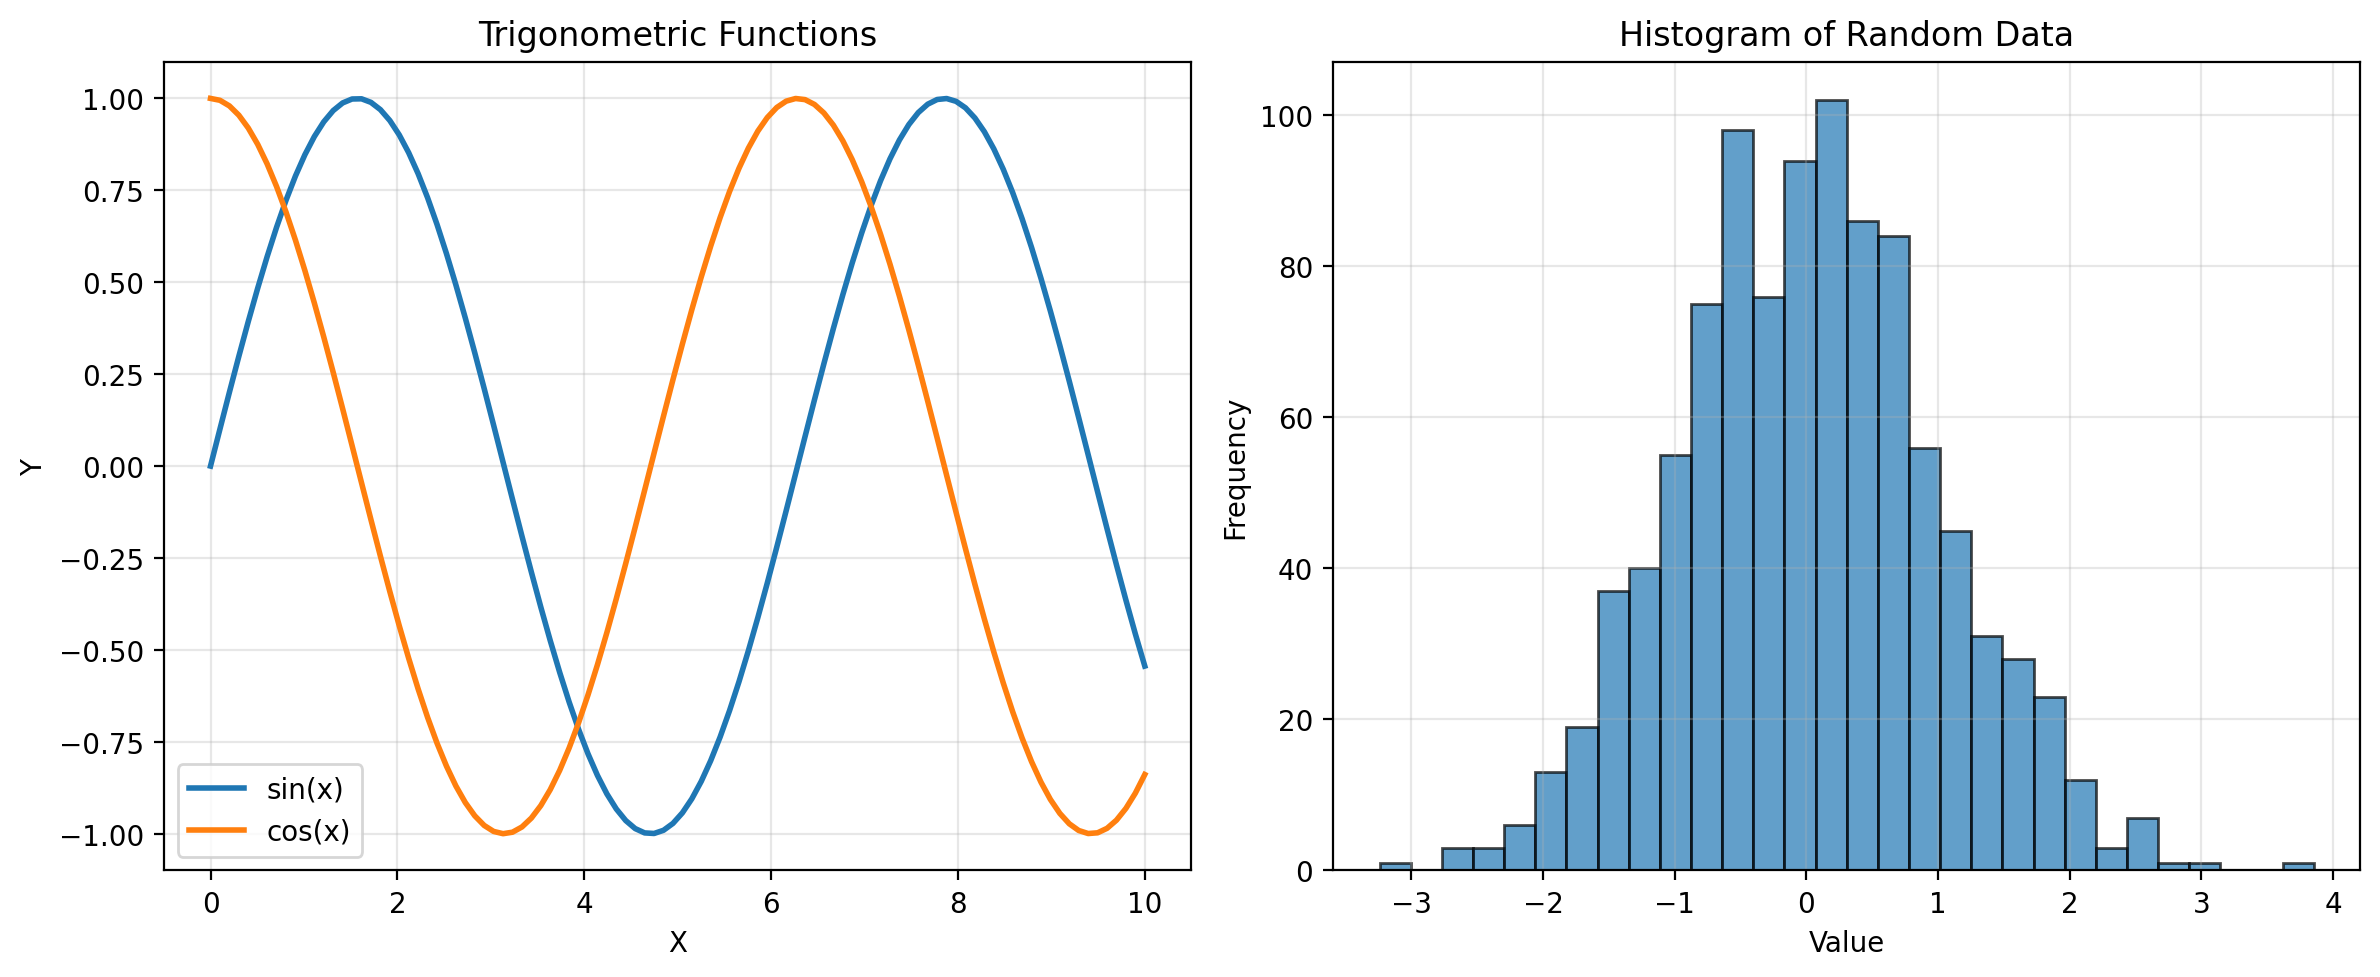

In [ ]:
random.seed(42)
np.random.seed(42)
# Create a Matplotlib figure
fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Line plot
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)

ax1.plot(x, y1, label="sin(x)", linewidth=2)
ax1.plot(x, y2, label="cos(x)", linewidth=2)
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.set_title("Trigonometric Functions")
ax1.legend()
ax1.grid(True, alpha=0.3)

# Histogram
data_hist = np.random.randn(1000)
ax2.hist(data_hist, bins=30, edgecolor="black", alpha=0.7)
ax2.set_xlabel("Value")
ax2.set_ylabel("Frequency")
ax2.set_title("Histogram of Random Data")
ax2.grid(True, alpha=0.3)

plt.tight_layout()
fig1

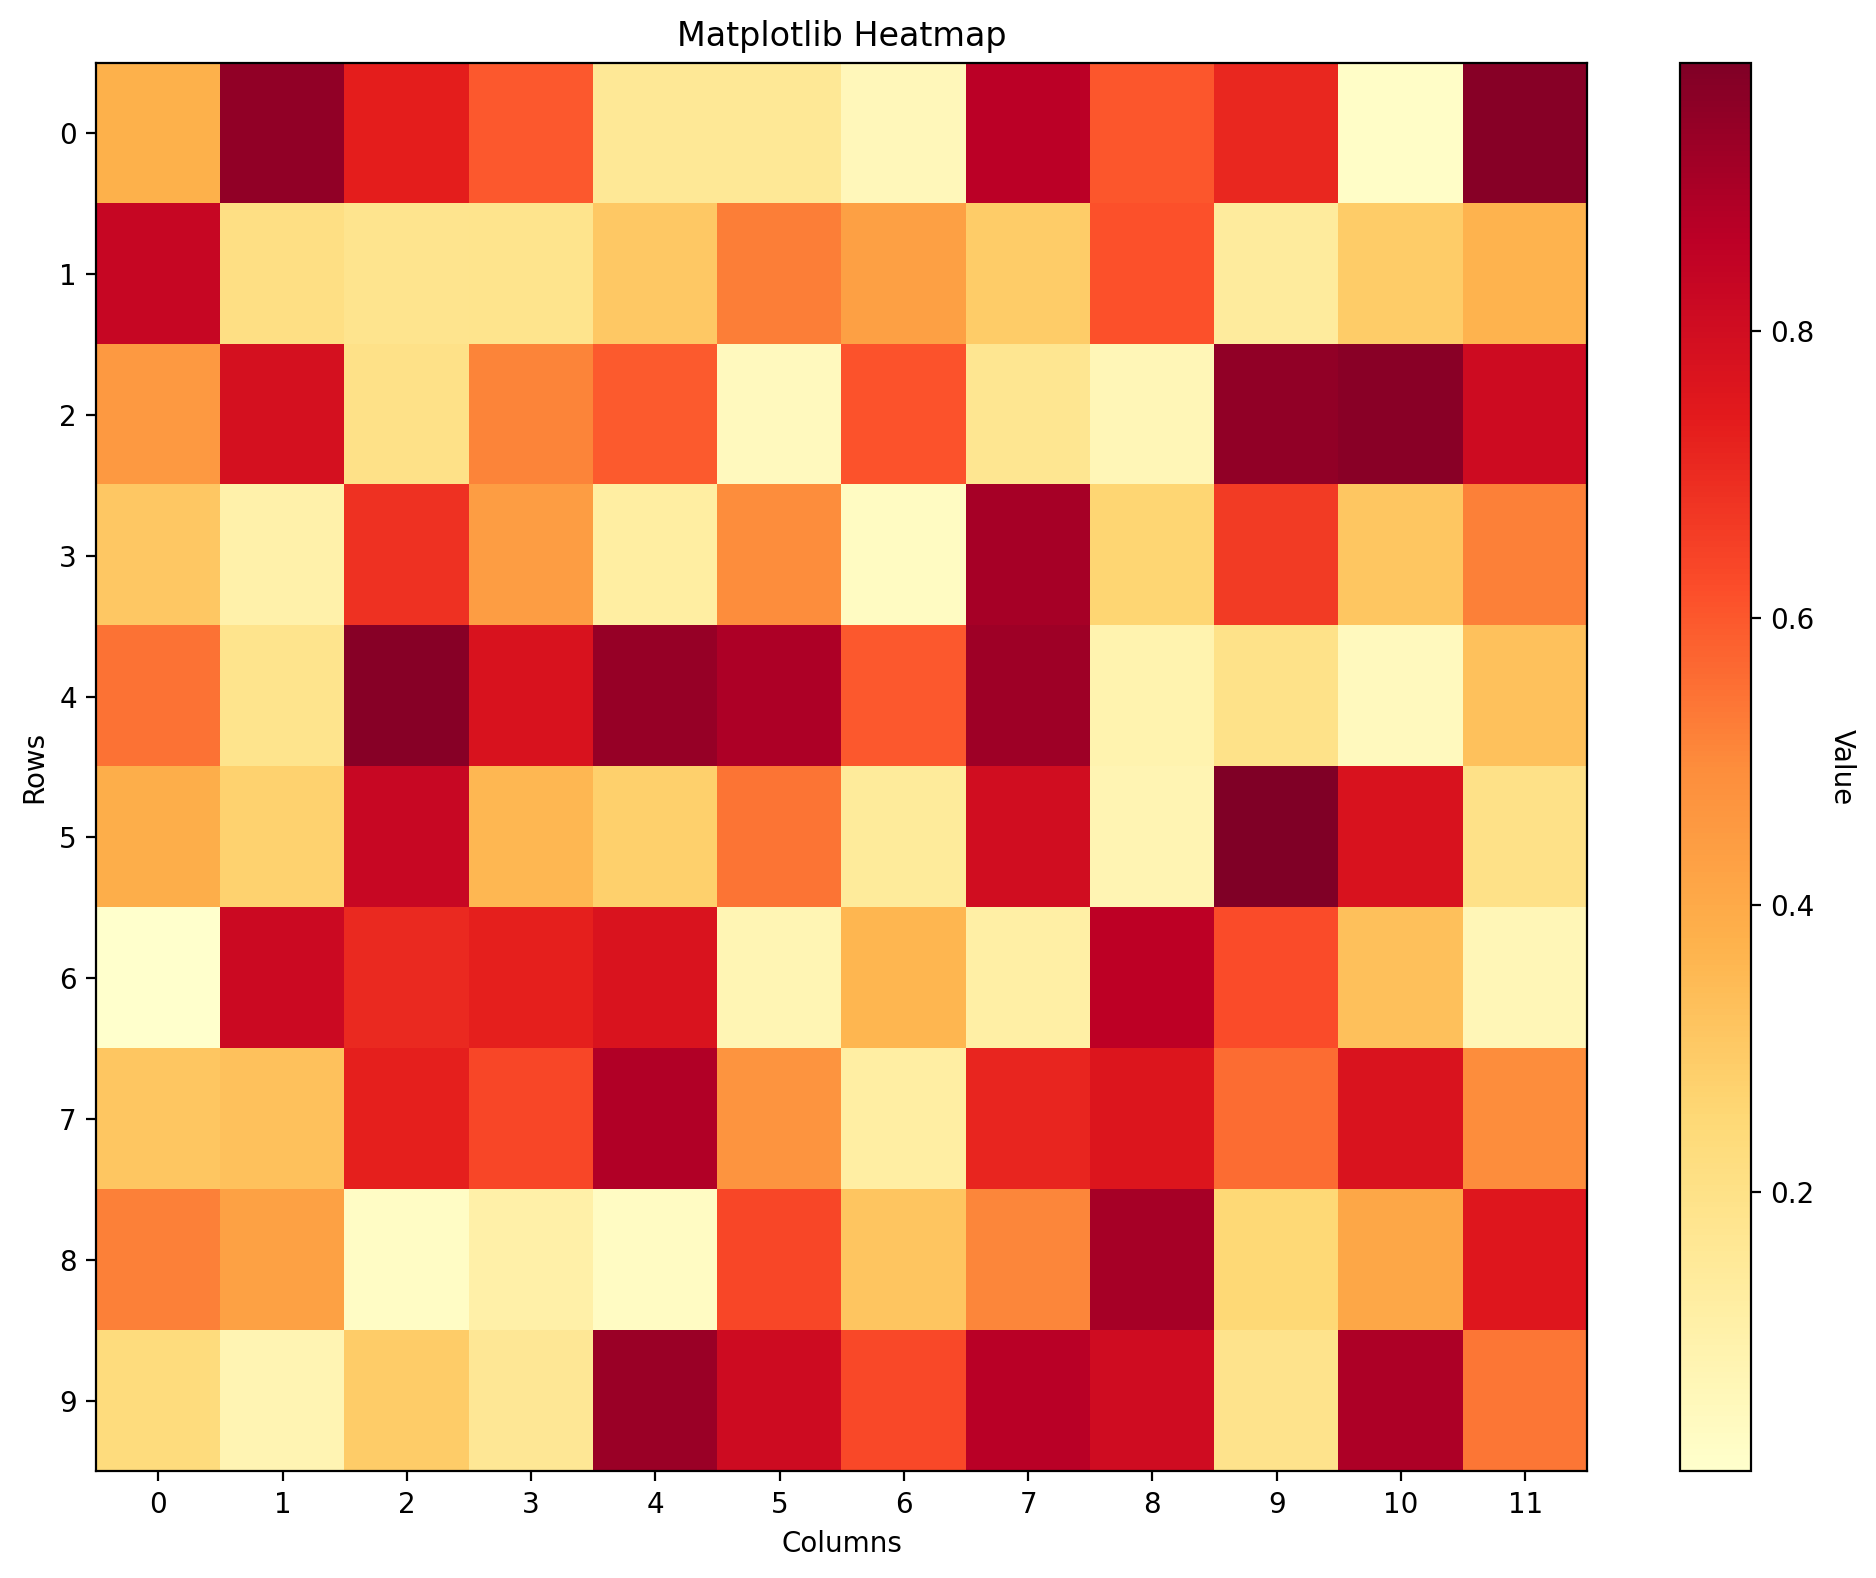

In [ ]:
random.seed(42)
np.random.seed(42)
# Heatmap example
fig2, ax = plt.subplots(figsize=(10, 8))

data_matrix = np.random.rand(10, 12)
im = ax.imshow(data_matrix, cmap="YlOrRd", aspect="auto")

ax.set_xticks(np.arange(12))
ax.set_yticks(np.arange(10))
ax.set_xlabel("Columns")
ax.set_ylabel("Rows")
ax.set_title("Matplotlib Heatmap")

# Add colorbar
cbar = plt.colorbar(im, ax=ax)
cbar.set_label("Value", rotation=270, labelpad=15)

plt.tight_layout()
fig2

## 8. Matplotlib Interactive

Create interactive matplotlib plots that respond to UI elements.

In [ ]:
# Create interactive matplotlib plot
fig_interactive, ax_interactive = plt.subplots(figsize=(12, 6))

x_interactive = np.linspace(0, 10, 500)
_amplitude = 1.0
_freq = 1.0
_phase = 0.0
y_interactive = _amplitude * np.sin(_freq * x_interactive + _phase)

ax_interactive.plot(x_interactive, y_interactive, linewidth=2, color="blue")

ax_interactive.set_xlabel("X", fontsize=12)
ax_interactive.set_ylabel("Y", fontsize=12)
ax_interactive.set_title(
    f"Interactive Plot: A={_amplitude:.1f}, f={_freq:.1f}, φ={_phase:.2f}",
    fontsize=14,
)
ax_interactive.grid(True, alpha=0.3)
ax_interactive.axhline(y=0, color="k", linestyle="-", linewidth=0.5)
ax_interactive.axvline(x=0, color="k", linestyle="-", linewidth=0.5)

plt.tight_layout()
mo.mpl.interactive(fig_interactive)

<iframe srcdoc='<!DOCTYPE html>
<html lang="en">
 <head>
 <base href='http://localhost:10654//mpl/5258069296/' />
 <link rel="stylesheet" href="http://localhost:10654//mpl/5258069296/_static/css/page.css" type="text/css" />
 <link rel="stylesheet" href="http://localhost:10654//mpl/5258069296/_static/css/boilerplate.css" type="text/css" />
 <link rel="stylesheet" href="http://localhost:10654//mpl/5258069296/_static/css/fbm.css" type="text/css" />
 <link rel="stylesheet" href="http://localhost:10654//mpl/5258069296/_static/css/mpl.css" type="text/css" />
 <link rel="stylesheet" href="http://localhost:10654//mpl/5258069296/custom.css" type="text/css" />
 <script src="http://localhost:10654//mpl/5258069296/mpl.js"></script>

 <script>
 function ondownload(figure, format) {
 window.open('download.' + format + '?figure=' + figure.id, '_blank');
 };

 function ready(fn) {
 if (document.readyState != "loading") {
 fn();
 } else {
 document.addEventListener("DOMContentLoaded", fn);
 }
 }

 ready(
 function() {
 var websocket_type = mpl.get_websocket_type();
 var websocket = new websocket_type("ws://localhost:10654//mpl/10654/ws?figure=5258069296");

 // mpl.figure creates a new figure on the webpage.
 var fig = new mpl.figure(
 // A unique numeric identifier for the figure
 5258069296,
 // A websocket object
 websocket,
 // A function called when a file type is selected for download
 ondownload,
 // The HTML element in which to place the figure
 document.getElementById("figure"));
 }
 );
 </script>

 <title>marimo</title>
 </head>

 <body>
 <div id="figure"></div>
 </body>
</html>' width='100%' height='550px' onload='__resizeIframe(this)' frameborder='0'>

## 9. Images

Display images from local files and remote URLs.

### Using HTML `<img>` tags

<div class="flex justify-between">
<img src="./public/cat.jpg" alt="Local cat image" width="400">

<img src="https://raw.githubusercontent.com/marimo-team/marimo/main/docs/_static/marimo-logotype-thick.svg" alt="Marimo logo" width="400">
</div>

### Using `mo.image()`

Local image: Remote image:
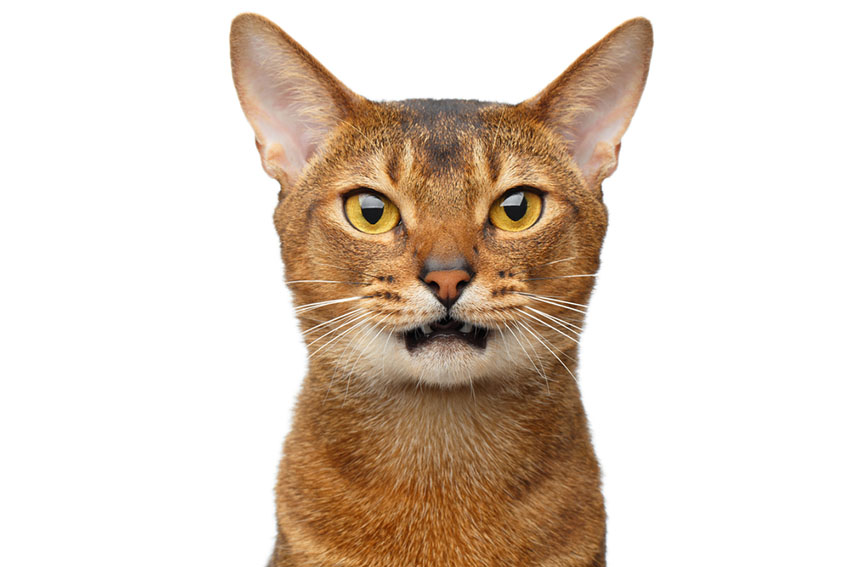

In [ ]:
# Local image using mo.image()
local_image = mo.image(
    src=mo.notebook_dir() / "public/cat.jpg", width=400, alt="Local cat image"
)

# Remote image using mo.image()
remote_image = mo.image(
    src="https://raw.githubusercontent.com/marimo-team/marimo/main/docs/_static/marimo-logotype-thick.svg",
    width=400,
    alt="Marimo logo from remote URL",
)

mo.hstack(
    [
        mo.md("**Local image:**"),
        local_image,
        mo.md("**Remote image:**"),
        remote_image,
    ]
)